# Анализ данных федерального медицинского центра ФГБОУ ВО СПбГПМУ

**Цель**: выявить факторы, влияющие на время, которое занимает процесс от выдачи направления до поступления в медицинский центр.

## Описание данных

Таблица hospital.csv содержит данные федерального медицинского центра ФГБОУ ВО СПбГПМУ.

- ДАТА_ПОСТУПЛЕНИЯ — дата поступления пациента в отделение;
- ДАТА_ВЫПИСКИ — дата выписки пациента из отделения;
- УНИКАЛЬНЫЙ_ID — идентификатор пациента;
- НОМЕР_ИБ — системное поле (номер информационной безопасности);
- ШИФР — системное поле;
- РЕГИОН — регион проживания пациента;
- ПЛАТЕЛЬЩИК — наименование плательщика;
- ИСТОЧНИК_ФИНАНСИРОВАНИЯ— ОМС или другой вариант;
- ОТДЕЛЕНИЕ— название отделения;
- ПРОФИЛЬ — профиль отделения (например, терапия, хирургия);
- КОЙКО_ДНИ— количество дней лечения в стационаре;
- ПЛАНОВО_ЭКСТРЕННО— поступил планово или экстренно;
- КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ— код диагноза при поступлении;
- КОД_МКБ_ПРИ_ВЫПИСКЕ— код диагноза при выписке.

## Структура проекта

1. Загрузка и предобработка
   - 1.1. Вывод общей информации.
   - 1.2. Переименование столбцов.
   - 1.3. Анализ типов данных, пропусков, дубликатов, замена некорректных значений
2. Исследовательский анализ
   - 2.1. Распределение длительности госпитализации пациентов
   - 2.2. Средняя длительность госпитализации по отделениям
   - 2.3. Количество поступивших пациентов по месяцам
   - 2.4. Проблемный датасет и причина возникновения пропусков
3. Проверка гипотез
   - 3.1. Проверка гипотез с одной выборкой
   - 3.2. Проверка гипотез с двумя выборками
4. Выводы.

## 1. Загрузка и предобработка данных
### 1.1. Вывод общей информации

In [1]:
import pandas as pd

In [2]:
df_hospital = pd.read_csv('https://code.s3.yandex.net/datasets/hospital.csv')

In [3]:
df_hospital.head()

,ДАТА_ПОСТУПЛЕНИЯ,ДАТА_ВЫПИСКИ,УНИКАЛЬНЫЙ_ID,НОМЕР_ИБ,ШИФР,РЕГИОН,ПЛАТЕЛЬЩИК,ИСТОЧНИК_ФИНАНСИРОВАНИЯ,ОТДЕЛЕНИЕ,ПРОФИЛЬ,КОЙКО_ДНИ,ПЛАНОВО_ЭКСТРЕННО,КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ,КОД_МКБ_ПРИ_ВЫПИСКЕ
0,01.01.2019,10.01.2019,858042000,1,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Микрохирургическое отделение,Сосудистой хирургии,10.0,Экстренная,S61.7,S66.4
1,01.01.2019,01.01.2019,993109000,3,5.13.1,NaN,"СПб филиал ООО ""СМК РЕСО - Мед""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
2,01.01.2019,01.01.2019,993111000,4,5.12.1,NaN,"ООО ""Капитал Медицинское Страхование""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
3,01.01.2019,07.01.2019,993110000,2,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Инфекционное отделение №1,Инфекционные,7.0,Экстренная,B27.9,J03.9
4,01.01.2019,05.01.2019,987185000,5,1.1.1,NaN,Коммерческие,Наличный расчет,ПЦ Акушерское физиологическое отделение,Для беременных и рожениц,5.0,Плановая,O42.9,O82.1


In [4]:
df_hospital.shape

(125261, 14)

### 1.2.Переименование столбцов

In [5]:
df_hospital.columns

Index(['ДАТА_ПОСТУПЛЕНИЯ', 'ДАТА_ВЫПИСКИ', 'УНИКАЛЬНЫЙ_ID', 'НОМЕР_ИБ', 'ШИФР',
       'РЕГИОН', 'ПЛАТЕЛЬЩИК', 'ИСТОЧНИК_ФИНАНСИРОВАНИЯ', 'ОТДЕЛЕНИЕ',
       'ПРОФИЛЬ', 'КОЙКО_ДНИ', 'ПЛАНОВО_ЭКСТРЕННО', 'КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ',
       'КОД_МКБ_ПРИ_ВЫПИСКЕ'],
      dtype='object')

In [6]:
hospital_columns = [ 'date_in','date_out', 'id', 'info_secur', 'code', 'region', 'payer', 'funding_source', 'department',
                    'specialty', 'days', 'routine_emergency', 'code_in', 'code_out']
df_hospital.columns = hospital_columns

In [7]:
df_hospital.columns

Index(['date_in', 'date_out', 'id', 'info_secur', 'code', 'region', 'payer',
       'funding_source', 'department', 'specialty', 'days',
       'routine_emergency', 'code_in', 'code_out'],
      dtype='object')

In [8]:
df_hospital.head()

,date_in,date_out,id,info_secur,code,region,payer,funding_source,department,specialty,days,routine_emergency,code_in,code_out
0,01.01.2019,10.01.2019,858042000,1,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Микрохирургическое отделение,Сосудистой хирургии,10.0,Экстренная,S61.7,S66.4
1,01.01.2019,01.01.2019,993109000,3,5.13.1,NaN,"СПб филиал ООО ""СМК РЕСО - Мед""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
2,01.01.2019,01.01.2019,993111000,4,5.12.1,NaN,"ООО ""Капитал Медицинское Страхование""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
3,01.01.2019,07.01.2019,993110000,2,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Инфекционное отделение №1,Инфекционные,7.0,Экстренная,B27.9,J03.9
4,01.01.2019,05.01.2019,987185000,5,1.1.1,NaN,Коммерческие,Наличный расчет,ПЦ Акушерское физиологическое отделение,Для беременных и рожениц,5.0,Плановая,O42.9,O82.1


### 1.3. Анализ типов данных, пропусков, замена некорректных значений

In [9]:
df_hospital.isnull().sum().sort_values(ascending = False)

region               68870
code_in                  8
code_out                 4
date_in                  0
date_out                 0
id                       0
info_secur               0
code                     0
payer                    0
funding_source           0
department               0
specialty                0
days                     0
routine_emergency        0
dtype: int64

Как видно, осталось несколько пропусков в коде диагноза при поступлении и при выписке. Они составляют незначительный процент от общего объёма данных, поэтому их можно просто удалить.

In [10]:
df_hospital['region'].unique()

array([nan, 'Ленинградская обл.', 'Владимирская обл.', 'Приморский край',
       'Оренбургская обл.', 'Смоленская обл.', 'Краснодарский край',
       'Респ-ка Узбекистан', 'Нижегородская обл.', 'г. Москва',
       'Вологодская обл.', 'Ростовская обл.', 'Самарская обл.',
       'Тверская обл.', 'Амурская область', 'Псковская обл.',
       'Республика Мордовия', 'Республика Карелия', 'Омская обл.',
       'Калининградская обл.', 'Новгородская обл.', 'Республика Калмыкия',
       'Тюменская обл.', 'Республика Коми', 'Ханты-Мансийский АО',
       'Пермский край', 'Ямало-Ненецкий АО', 'Новосибирская обл.',
       'Республика Дагестан', 'Мурманская обл.', 'Красноярский край',
       'Азербайджанская респ', 'Саратовская обл.', 'Дальнее зарубежье',
       'Московская обл.', 'Республика Татарстан', 'Республика Бурятия',
       'Свердловская обл.', 'Карач.-Черкесск.респ', 'Волгоградская обл.',
       'Респ. Башкортостан', 'г.Севастополь', 'Кемеровская обл.',
       'Пензенская обл.', 'Респ.Север

In [11]:
df_hospital = df_hospital.dropna(subset=['code_in', 'code_out'])

Столбец `region` содержит информацию о месте жительства пациента. Однако  нет дополнительных данных для его восстановления, поэтому его следует удалить.

In [12]:
df_hospital = df_hospital.drop(columns=["region"])

In [13]:
df_hospital.isnull().sum().sort_values(ascending = False)

date_in              0
date_out             0
id                   0
info_secur           0
code                 0
payer                0
funding_source       0
department           0
specialty            0
days                 0
routine_emergency    0
code_in              0
code_out             0
dtype: int64

In [14]:
df_hospital.dtypes

date_in               object
date_out              object
id                     int64
info_secur             int64
code                  object
payer                 object
funding_source        object
department            object
specialty             object
days                 float64
routine_emergency     object
code_in               object
code_out              object
dtype: object

In [15]:
# Поменяем тип данных в столбцах с датой с типа object на datetime64[ns]
df_hospital['date_in'] = df_hospital['date_in'].astype('datetime64[ns]')
df_hospital['date_out'] = df_hospital['date_out'].astype('datetime64[ns]')

In [16]:
df_hospital['days'] = df_hospital['days'].astype('int')

In [17]:
df_hospital.dtypes

date_in              datetime64[ns]
date_out             datetime64[ns]
id                            int64
info_secur                    int64
code                         object
payer                        object
funding_source               object
department                   object
specialty                    object
days                          int32
routine_emergency            object
code_in                      object
code_out                     object
dtype: object

In [18]:
df_hospital.head()

,date_in,date_out,id,info_secur,code,payer,funding_source,department,specialty,days,routine_emergency,code_in,code_out
0,2019-01-01,2019-10-01,858042000,1,5.4.1,"ОАО ""ГСМК"" СПб",ОМС,Микрохирургическое отделение,Сосудистой хирургии,10,Экстренная,S61.7,S66.4
1,2019-01-01,2019-01-01,993109000,3,5.13.1,"СПб филиал ООО ""СМК РЕСО - Мед""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1,Экстренная,K37,K63.8
2,2019-01-01,2019-01-01,993111000,4,5.12.1,"ООО ""Капитал Медицинское Страхование""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1,Экстренная,K37,K63.8
3,2019-01-01,2019-07-01,993110000,2,5.4.1,"ОАО ""ГСМК"" СПб",ОМС,Инфекционное отделение №1,Инфекционные,7,Экстренная,B27.9,J03.9
4,2019-01-01,2019-05-01,987185000,5,1.1.1,Коммерческие,Наличный расчет,ПЦ Акушерское физиологическое отделение,Для беременных и рожениц,5,Плановая,O42.9,O82.1


In [19]:
# Определим количество полных дубликатов. Используем метод `.duplicated(keep=False)`, чтобы найти все строки, которые повторяются в датасете.
df_full_duplicates = df_hospital[df_hospital.duplicated(keep=False)]

df_full_duplicates.shape

(8820, 13)

In [20]:
# Проверка на дубликаты (по всем столбцам)
has_duplicates = df_hospital.duplicated().any()
print(f"Есть дубликаты: {has_duplicates}")

# Или подсчет дубликатов
duplicate_count = df_hospital.duplicated().sum()
print(f"Количество дубликатов: {duplicate_count}")

Есть дубликаты: True
Количество дубликатов: 4415


In [21]:
# Показать все дубликаты (keep=False покажет все копии)
duplicates = df_hospital[df_hospital.duplicated(keep=False)]
print("Дублирующиеся строки:")
print(duplicates)

Дублирующиеся строки:
          date_in   date_out          id  info_secur     code  \
550    2019-01-14 2019-01-31   994080000         732   5.99.0   
551    2019-01-14 2019-01-31   994080000         732   5.99.0   
578    2019-01-14 2019-01-29   268622000         780    5.5.1   
579    2019-01-14 2019-01-29   268622000         780    5.5.1   
622    2019-01-15 2019-01-25   762227000         844    5.4.1   
...           ...        ...         ...         ...      ...   
125235 2023-12-29 2024-01-01   130826000       38531  5.666.0   
125236 2023-12-29 2023-12-31   207998000       38533  5.666.0   
125237 2023-12-29 2023-12-31   207998000       38533  5.666.0   
125241 2023-12-29 2024-01-01  1168777000       38538  5.666.0   
125242 2023-12-29 2024-01-01  1168777000       38538  5.666.0   

                                        payer funding_source  \
550                          Фонд-Иногородние            ОМС   
551                          Фонд-Иногородние            ОМС   
578  

In [22]:
combo_duplicates = df_hospital.duplicated(subset=['date_in', 'date_out', 'id']).sum()
print(f"Дубликатов date_in + date_out: {combo_duplicates}")

Дубликатов date_in + date_out: 4437


In [23]:
# Удалить дубликаты (оставляем первое вхождение)
df_cleaned = df_hospital.drop_duplicates()

In [24]:
# Проверка на дубликаты (по всем столбцам)
has_duplicates1 = df_cleaned.duplicated().any()
print(f"Есть дубликаты: {has_duplicates1}")

# Или подсчет дубликатов
duplicate_count1 = df_cleaned.duplicated().sum()
print(f"Количество дубликатов: {duplicate_count1}")

Есть дубликаты: False
Количество дубликатов: 0


In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120836 entries, 0 to 125260
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_in            120836 non-null  datetime64[ns]
 1   date_out           120836 non-null  datetime64[ns]
 2   id                 120836 non-null  int64         
 3   info_secur         120836 non-null  int64         
 4   code               120836 non-null  object        
 5   payer              120836 non-null  object        
 6   funding_source     120836 non-null  object        
 7   department         120836 non-null  object        
 8   specialty          120836 non-null  object        
 9   days               120836 non-null  int32         
 10  routine_emergency  120836 non-null  object        
 11  code_in            120836 non-null  object        
 12  code_out           120836 non-null  object        
dtypes: datetime64[ns](2), int32(1), int64(2), object(

## 2. Исследовательский анализ данных

### 2.1. Распределение длительности госпитализации пациентов

In [26]:
import matplotlib.pyplot as plt

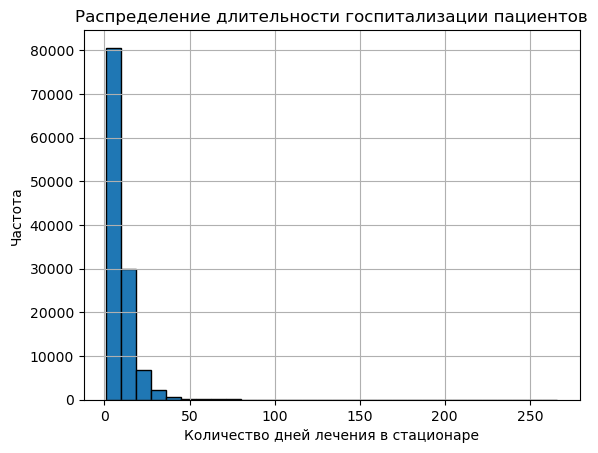

In [27]:
df_cleaned['days'].hist(bins=30, edgecolor='black')
plt.title('Распределение длительности госпитализации пациентов')
plt.xlabel('Количество дней лечения в стационаре')
plt.ylabel('Частота')
plt.show()

* большинство пациентов провело меньше 10 дней в стационаре;
* распределение смещено влево (`right-skewed`) – короткие госпитализации встречаются гораздо чаще;
* есть пациенты с пребыванием более 50, 100 и даже 250 дней, но их очень мало;
* это может быть связано с хроническими заболеваниями, реабилитацией или сложными случаями.

Распределение длительности госпитализации пациентов можно оценить с помощью библиотек matplotlib и seaborn — последнюю нужно подключить. Для этого воспользуемся df.boxplot(), передав в него параметр колонки, по которой нужно выполнить вычисления.

In [28]:
import seaborn as sns

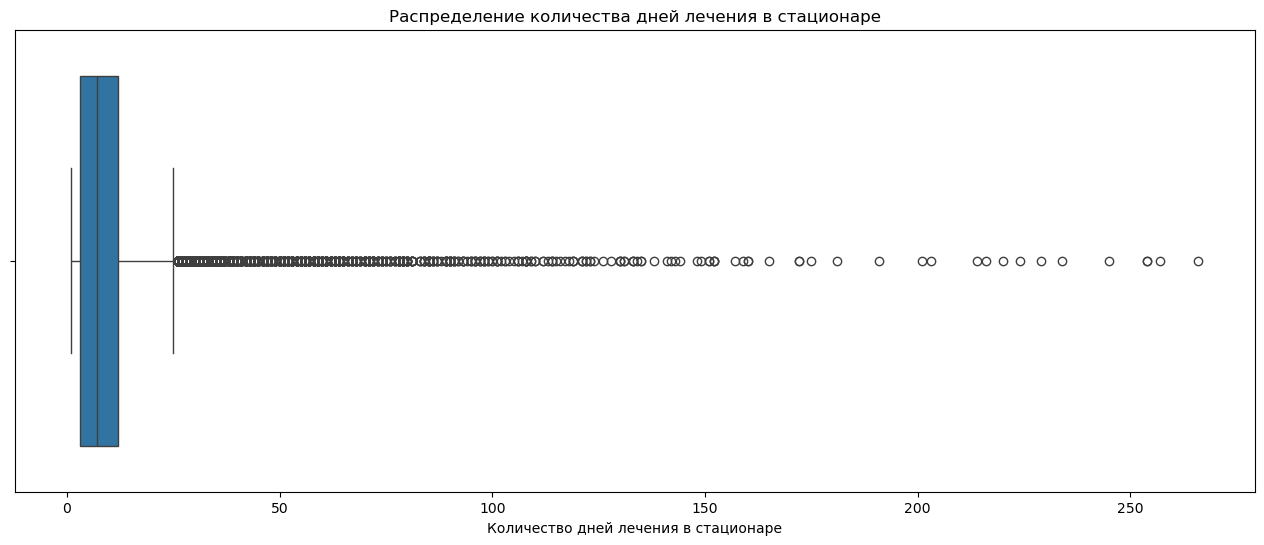

In [29]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df_cleaned['days'])

plt.xlabel("Количество дней лечения в стационаре")
plt.title("Распределение количества дней лечения в стационаре")

plt.show()

In [30]:
# Выведем основные статистики по days
print("Описательная статистика по days:")
df_cleaned['days'].describe()

Описательная статистика по days:


count    120836.000000
mean          8.728508
std           8.765610
min           1.000000
25%           3.000000
50%           7.000000
75%          12.000000
max         266.000000
Name: days, dtype: float64

* половина пациентов проводит в стационаре не более недели;
* среднее значение (8.7 дней) выше медианы, что говорит о наличии выбросов – пациентов, которые находятся в стационаре гораздо дольше;
* 25% пациентов (Q1) проводят ≤ 3 дней в стационаре, что говорит о значительном количестве краткосрочных госпитализаций;
* максимальное значение — 266 дней.

### 2.2. Средняя длительность госпитализации по отделениям

В некоторых отделениях пациенты находятся дольше. Это может быть связано со спецификой лечения. Выведем среднюю длительность госпитализации по отделениям.

In [31]:
print("Распределение длительности госпитализации пациентов по отделениям:")
dept_stay = df_cleaned.groupby('department')['days'].mean().sort_values(ascending=False)
dept_stay

Распределение длительности госпитализации пациентов по отделениям:


department
Отделение анестезиологии-реанимации                                                                          45.179487
ПЦ ОАРИТН №1 (новорожденных)                                                                                 28.723214
ПЦ Отделение Анестезиологии-реанимации для детей с кардиохирургической патологией                            26.438095
ПЦ Отделение патологии новорожденных и детей грудного возраста                                               22.098196
ПЦ Отделение вспомогательных репродуктивных технологий ДС                                                    21.297802
Дневной стационар Кожно-венерологического отделения                                                          14.027322
Дневной стационар Гастроэнтерологического отделения                                                          13.339286
Микрохирургическое отделение                                                                                 13.293007
Педиатрическое отделение №1          

Самые длительные госпитализации наблюдаются в следующих отделениях:

- отделение анестезиологии-реанимации (45.2 дней) – это логично, так как пациенты в реанимации находятся в тяжёлом состоянии и часто требуют интенсивной терапии;
- ПЦ ОАРИТН №1 (новорождённых) – 28.7 дней – новорождённые с осложнениями или недоношенные дети требуют длительного медицинского наблюдения;
- кардиохирургическая реанимация для детей (26.4 дней) – длительный период наблюдения после сложных операций.
  
Краткосрочные госпитализации (< 5 дней):

- ПЦ ОАРИТ №2 для беременных, рожениц и родильниц (1.5 дня) – вероятно, связано с коротким наблюдением после родов;
- ПЭМП ДПО (1 день) – возможно, это диагностическое отделение или экстренная помощь, где пациенты не задерживаются.

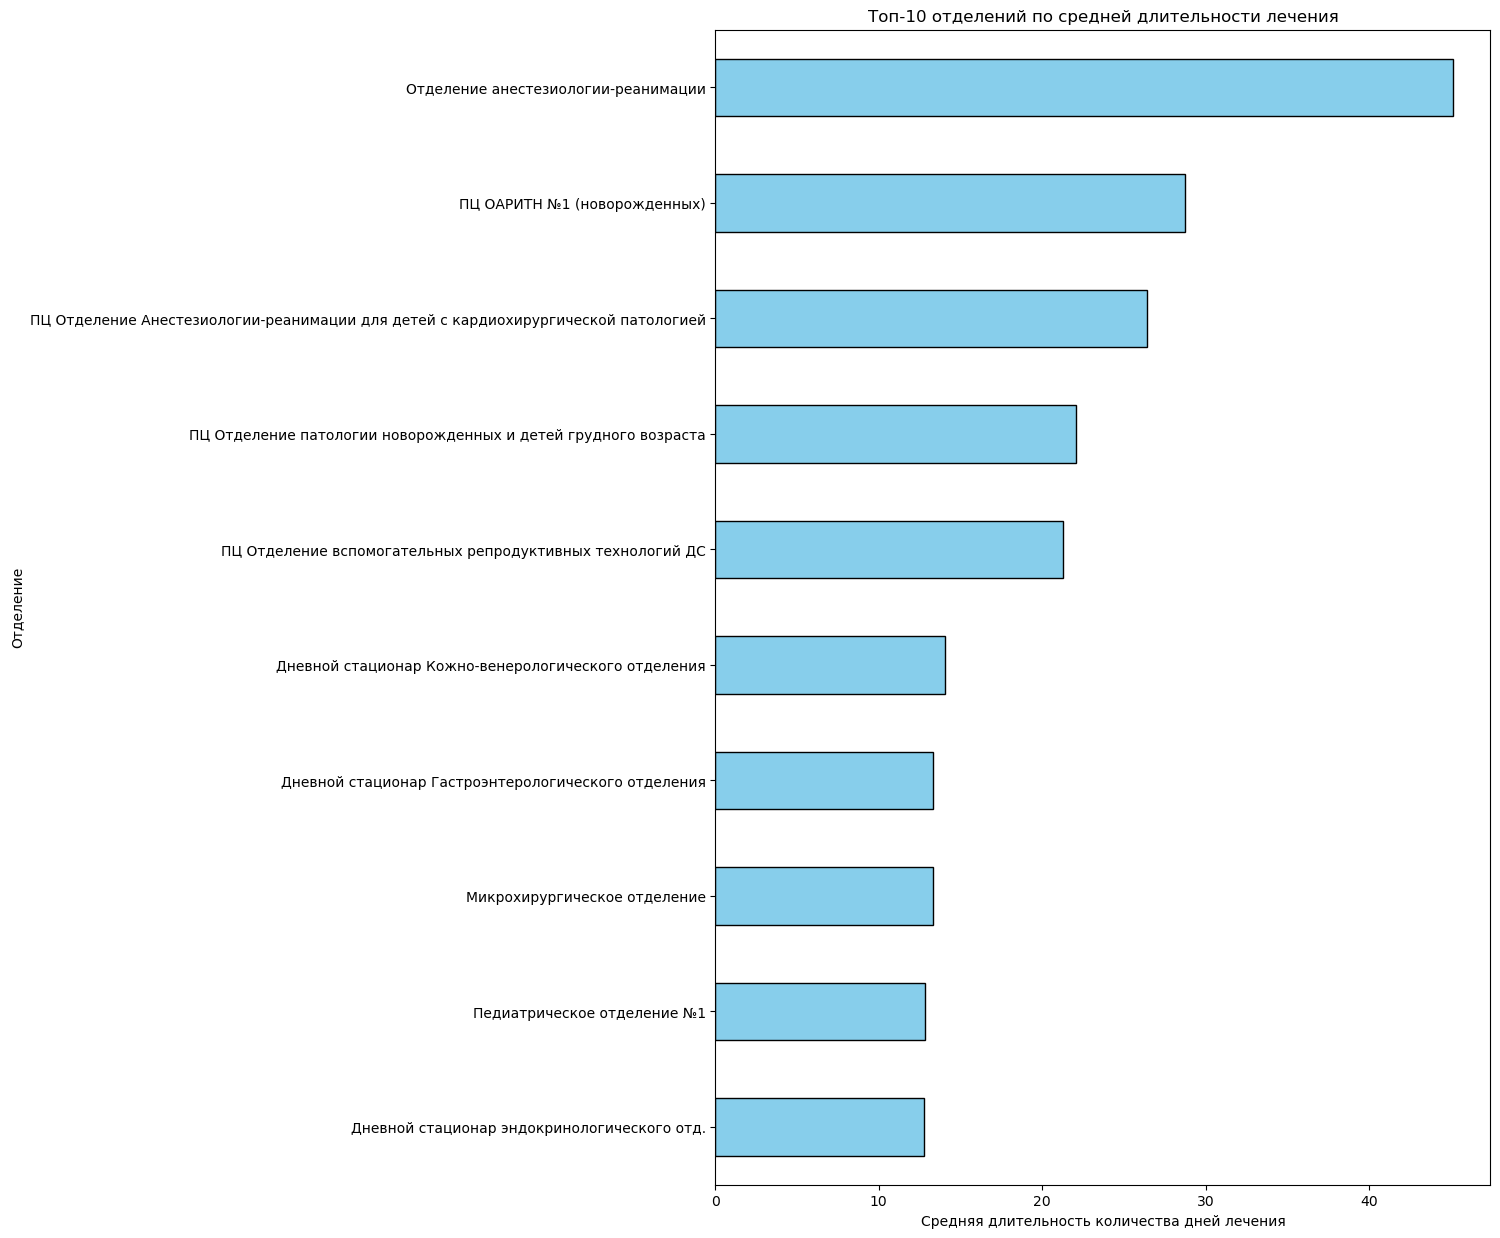

In [32]:
# Построим линейчатую диаграмму топ-10 отделений по средней длительности госпитализации
plt.figure(figsize=(10, 15))
dept_stay.head(10).sort_values(ascending=True).plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Средняя длительность количества дней лечения")
plt.ylabel("Отделение")
plt.title("Топ-10 отделений по средней длительности лечения")
plt.show()

### 2.3. Количество поступивших пациентов по месяцам

Добавим столбец с месяцем госпитализации. Преобразуем столбец даты поступления пациента в отделение в формат «год-месяц» (.dt.to_period("M")). С помощью функции df.groupby() сгруппируем данные по месяцу госпитализации. Количество поступивших пациентов посчитаем с помощью функции df.nunique().

In [33]:
df_cleaned["Месяц_госпитализации"] = df_cleaned["date_in"].dt.to_period("M")
hospitalizations_over_time = df_cleaned.groupby("Месяц_госпитализации")["id"].nunique()

C:\Users\р\AppData\Local\Temp\ipykernel_10296\770343075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Месяц_госпитализации"] = df_cleaned["date_in"].dt.to_period("M")


In [34]:
df_cleaned

,date_in,date_out,id,info_secur,code,payer,funding_source,department,specialty,days,routine_emergency,code_in,code_out,Месяц_госпитализации
0,2019-01-01,2019-10-01,858042000,1,5.4.1,"ОАО ""ГСМК"" СПб",ОМС,Микрохирургическое отделение,Сосудистой хирургии,10,Экстренная,S61.7,S66.4,2019-01
1,2019-01-01,2019-01-01,993109000,3,5.13.1,"СПб филиал ООО ""СМК РЕСО - Мед""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1,Экстренная,K37,K63.8,2019-01
2,2019-01-01,2019-01-01,993111000,4,5.12.1,"ООО ""Капитал Медицинское Страхование""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1,Экстренная,K37,K63.8,2019-01
3,2019-01-01,2019-07-01,993110000,2,5.4.1,"ОАО ""ГСМК"" СПб",ОМС,Инфекционное отделение №1,Инфекционные,7,Экстренная,B27.9,J03.9,2019-01
4,2019-01-01,2019-05-01,987185000,5,1.1.1,Коммерческие,Наличный расчет,ПЦ Акушерское физиологическое отделение,Для беременных и рожениц,5,Плановая,O42.9,O82.1,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125256,2023-12-30,2023-12-31,714221000,38557,5.666.0,ОМС 86 Регион,ОМС,Хирургическое отделение №3,Хирургические для детей,2,Экстренная,L02.8,L02.8,2023-12
125257,2023-12-30,2024-06-01,1258807000,38558,5.12.1,"ООО ""Капитал Медицинское Страхование""",ОМС,Инфекционное отделение №1,Инфекционные,8,Экстренная,J01.9,J06.8,2023-12
125258,2023-12-30,2024-01-26,1258810000,38560,5.666.1,ОМС 86 Регион,ОМС,Гастроэнтерологическое отделение,Гастроэнтерологические,28,Плановая,K75.4,K73.2,2023-12
125259,2023-12-30,2023-12-30,1258811000,38561,5.666.0,ОМС 86 Регион,ОМС,ПЭМП ДПО,Хирургические для детей,1,Экстренная,K59.0,K59.0,2023-12


Для визуализации можно использовать линейный график с помощью `df.plot()`. Для удобства можно задать параметры, такие как цвет линии `color`, маркеры для точек `marker` и стиль линии `linestyle`.

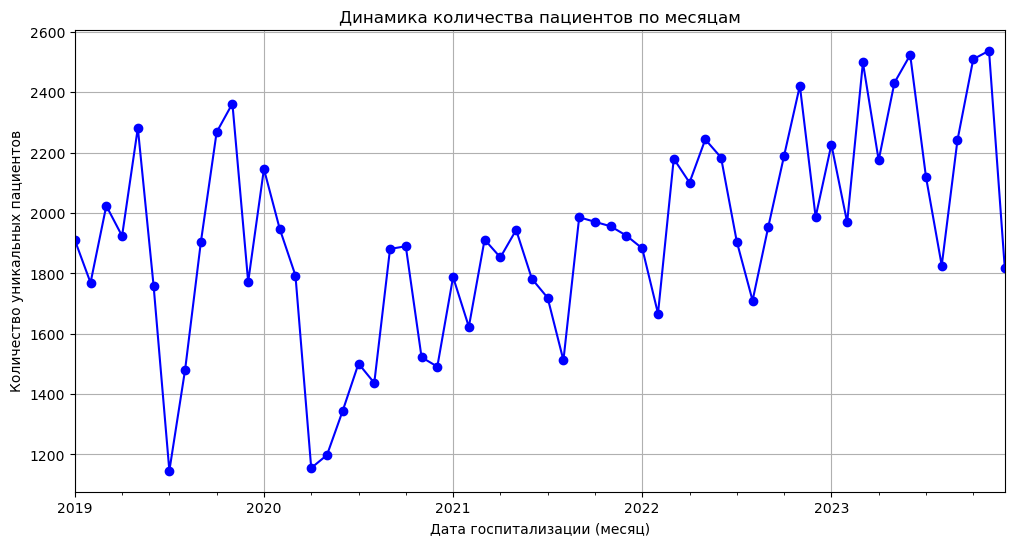

In [35]:
plt.figure(figsize=(12, 6))
hospitalizations_over_time.plot(color='blue', marker='o', linestyle='-')

plt.xlabel("Дата госпитализации (месяц)")
plt.ylabel("Количество уникальных пациентов")
plt.title("Динамика количества пациентов по месяцам")
plt.grid()
plt.show()

## 3. Проверка гипотез

### 3.1. Проверка гипотез с одной выборкой

*Проверим, отличается ли средняя длительность госпитализации пациентов от стандартного срока в 7 дней.*

На основе ранее рассчитанных данных, средняя длительность госпитализации в больницах составляет немного больше 7 дней. Однако есть сомнения в актуальности этой гипотезы, поэтому её стоит проверить.

Средняя длительность госпитализации равна 7 дням (стандартный срок госпитализации).

- 𝐻_0 : Средняя длительность госпитализации в больницах= 7.
- 𝐻_1 : Средняя длительность госпитализации в больницах не равна 7.

In [36]:
from scipy import stats as st
import numpy as np

In [37]:
expected_mean_time = 7

alpha = 0.05

results = st.ttest_1samp(df_cleaned['days'],
                         expected_mean_time,
                         alternative = 'two-sided')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 0.0
Отвергаем нулевую гипотезу


Это означает, что у нас недостаточно обоснований, чтобы не отвергнуть нулевую гипотезу. Поэтому с большей вероятностью можно отклонить нулевую гипотезу и сказать, что фактическое среднее время госпитализации в больнице значимо отличается от  7 дней.

*Далее проверим, превышает ли средняя длительность госпитализации пациентов 10 дней*

* H_0: Средняя длительность госпитализации в больницах = 10.
* H_1: Средняя длительность госпитализации в больницах > 10

In [38]:
expected_mean_price = 10
alpha = 0.05

results = st.ttest_1samp(
    df_cleaned['days'],
    expected_mean_price,
    alternative='greater')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


Видно, что p-значение очень большое, а это значит что отвергнуть нулевую гипотезу не получилось. Следовательно, нельзя утверждать, что средняя длительность госпитализации пациентов статистически значимо превышает 10 дней.

### 3.2. Проверка гипотез с двумя выборками

Необходимо изучить, различается ли средняя продолжительность лечения в стационаре между плановыми и экстренными пациентами?

* H_0 : Среднее количество дней лечения в стационаре отличается между плановыми и экстренными пациентами одинаково.
* H_1 : Среднее количество дней лечения в стационаре отличается между плановыми и экстренными пациентами различается.

In [39]:
plan_group = df_cleaned[df_cleaned["routine_emergency"] == "Плановая"]["days"]
urgent_group = df_cleaned[df_cleaned["routine_emergency"] == "Экстренная"]["days"]

In [40]:
plan_group.mean()

9.716638313138677

In [41]:
urgent_group.mean()

6.248380631481105

Время пребывания очень разное. После экстренной госпитализации человек в среднем задерживается на 3 дня меньше.

In [42]:
alpha = 0.05

results = st.ttest_ind(
    plan_group,
    urgent_group,
    alternative='two-sided')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


Таким образом, нельзя говорить, что среднее количество дней лечения в стационаре отличается между плановыми и экстренными пациентами одинаково. С точки зрения статистики, разница недостаточно значима.

## 4. Выводы

Анализ распределения количества дней лечения в стационаре с помощью гистограммы показал, что большинство пациентов пребывают в больнице относительно недолго. Ту же тенденцию подтвердил box plot. Поэтому для нормального функционирования отделений важно было проверить гипотезу: действительно ли средняя продолжительность госпитализации равна неделе?

Вы сравнили среднее по выборке с определённым числом, используя  одновыборочный t-тест Стьюдента. В результате теста нулевая гипотеза была отвергнута.

Для анализа максимальной загрузки коечного фонда была проверена гипотеза: превышает ли средняя продолжительность госпитализации 10 дней.
В этом случае нулевая гипотеза не была отвергнута. Это означает, что нет достаточных статистических оснований утверждать, что среднее время пребывания пациентов превышает 10 дней. Это говорит о том, что текущая средняя продолжительность госпитализации не создаёт значительных рисков переполнения стационара.

Кроме того нужно было проверить гипотезу, которая затрагивала экстренную и плановую госпитализации. Визуально (например, по средним значениям) разница есть, но важно понять, насколько она значима с точки зрения статистики. Для сравнения двух независимых групп применили t-тест Стьюдента для двух выборок.

Уровень значимости задали в 5%. То есть приняли 5%-ный риск сделать ошибку, если в действительности разницы между группами нет. Другими словами, в 5 случаях из 100 можно случайно обнаружить различие, которого на самом деле нет.

**Как это влияет на решение**
* Если p-value (результат статистического теста) меньше 0.05 → отвергаем нулевую гипотезу, считаем различие статистически значимым.
* Если p-value больше 0.05 → недостаточно данных, чтобы отвергнуть нулевую гипотезу.

Вы сравнили среднюю длительность госпитализации между экстренными и плановыми пациентами.
Получили p-value < 0.05, что говорит о значимых различиях между группами.
Это значит, что вероятность того, что разница между средними значениями случайна, меньше 5%. Таким образом, мы отвергаем нулевую гипотезу и утверждаем, что различие между средними значениями групп существует.

Эти результаты можно использовать для оптимизации коечного фонда и планирования загрузки стационара.